# [Kaggle_time series analysis](https://www.kaggle.com/datasets/kandij/electric-production)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv(os.getcwd() + '/data/archive/Electric_Production.csv')
display(df.head())
print(df.shape)
print(df.info())

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


(397, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


In [13]:
df.isna().sum()

DATE     0
Value    0
dtype: int64

In [3]:
# 인덱스 재설정
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

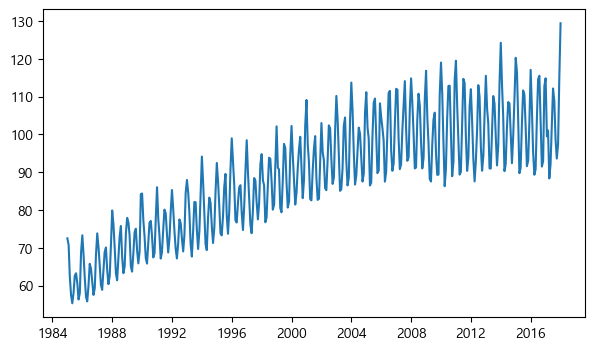

In [21]:
# 원본 데이터 시각화
plt.figure(figsize=(7,4))
plt.plot(df.index, df['Value']);

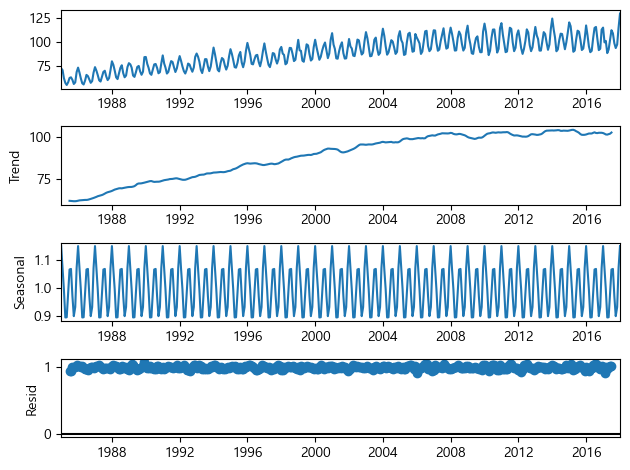

In [25]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df
result = seasonal_decompose(ts, model = 'multiplicative')
result.plot();

In [21]:
# 정상성 변환
from statsmodels.tsa.stattools import adfuller

# train, test data 구분
training = df.iloc[:300]
test = df.drop(training.index)

adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1])) # 정상성 만족 못함

ADF Statistic: -1.5612782839922599
p-value: 0.8072283405699914


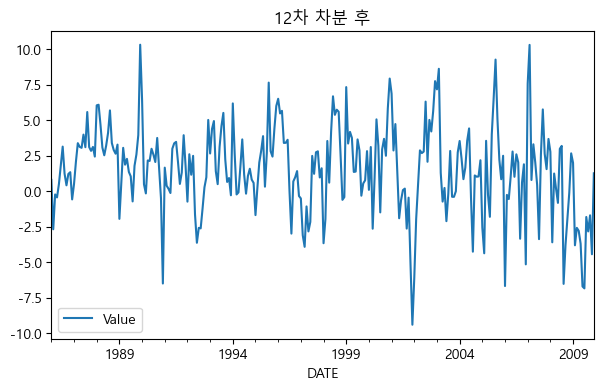

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_data = training.diff(12)
diff_data = diff_data.dropna()
diff_data.plot(figsize=(7,4))
plt.title('12차 차분 후');

In [25]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1])) # 정상성 만족함

ADF Statistic: -5.209448676654735
p-value: 8.409850335029629e-06


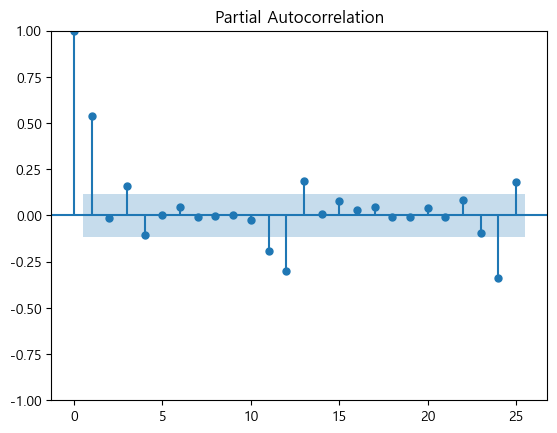

In [26]:
# AR 모형
plot_pacf(diff_data);

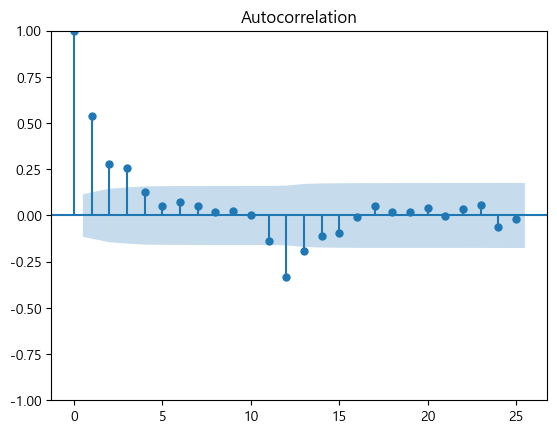

In [27]:
# MA 모형
plot_acf(diff_data);

In [33]:
p=range(0,4) 
d=range(0,2) 
q=range(0,4) 

import itertools

pdq=list(itertools.product(p,d,q))
PDQS=[(x[0],x[1],x[2],12) for x in pdq]

In [40]:
import statsmodels.api as sm
best=np.inf
b_order=()
bs_order=()

for param in pdq: 
    for seasonal_param in PDQS:
        model = sm.tsa.statespace.SARIMAX(training['Value'],
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq="MS") 
        results = model.fit(disp=False)
        
        if(results.aic<best):
            best=results.aic
            b_order=param
            bs_order=seasonal_param

KeyboardInterrupt: 

In [ ]:
print(f"\n\nBest Model: order:{b_order} and seasonal order: {bs_order}")

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(training, order = (1, 12, 3))
# res = model.fit()
# res.summary()

In [ ]:
# plt.plot(res.predict())
# plt.plot(training);